In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=sns.load_dataset("titanic")

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
df["age"].fillna(df["age"].mean(),inplace=True)

In [23]:
df["deck"].fillna(method='ffill',inplace=True)

In [24]:
df["embark_town"].fillna(method='bfill',inplace=True)

In [26]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder

In [30]:
column=['sex','who','deck','embark_town','class']
Le=LabelEncoder()
for i in column:
    df[i]=Le.fit_transform(df[i])


In [33]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,1,True,2,2,no,0
1,1,1,0,38.0,1,0,71.2833,0,2,False,2,0,yes,0
2,1,3,0,26.0,0,0,7.9250,2,2,False,2,2,yes,1
3,1,1,0,35.0,1,0,53.1000,0,2,False,2,2,yes,0
4,0,3,1,35.0,0,0,8.0500,2,1,True,4,2,no,1


In [32]:
df['alone']=Le.fit_transform(df['alone'])

In [36]:
df['adult_male']=Le.fit_transform(df['adult_male'])

In [37]:
df.drop(columns='pclass',inplace=True)

In [46]:
X=df.drop(columns=['alive','survived'])

In [47]:
df['alive']=df['alive'].map({'yes':1,'no':0})

In [57]:
y=df['survived']

<Axes: >

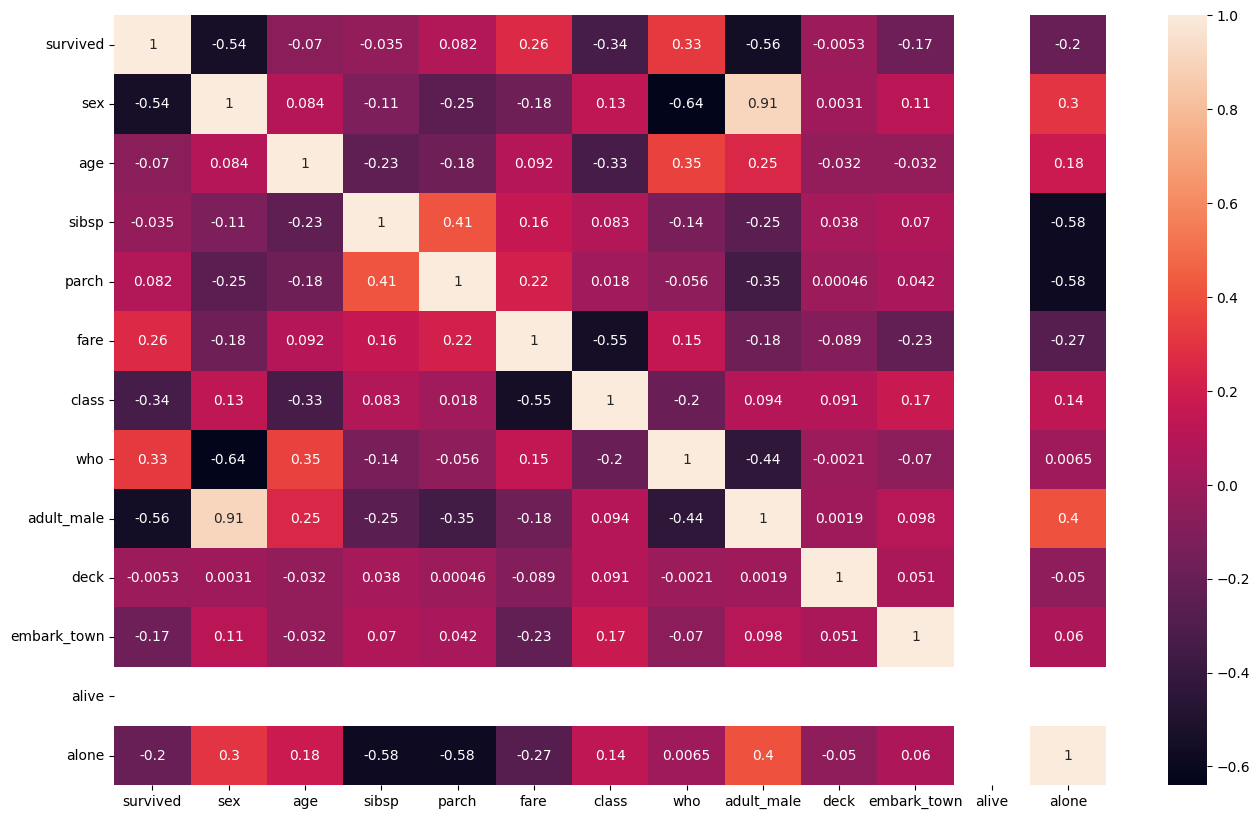

In [49]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

In [50]:
c=df.corr()

In [53]:
c['survived'].sort_values(ascending=False)

survived       1.000000
who            0.325753
fare           0.257307
parch          0.081629
deck          -0.005292
sibsp         -0.035322
age           -0.069809
embark_town   -0.172726
alone         -0.203367
class         -0.338481
sex           -0.543351
adult_male    -0.557080
alive               NaN
Name: survived, dtype: float64

In [54]:
X.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone
0,1,22.0,1,0,7.2500,2,1,1,2,2,0
1,0,38.0,1,0,71.2833,0,2,0,2,0,0
2,0,26.0,0,0,7.9250,2,2,0,2,2,1
3,0,35.0,1,0,53.1000,0,2,0,2,2,0
4,1,35.0,0,0,8.0500,2,1,1,4,2,1


In [58]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

<Axes: xlabel='survived'>

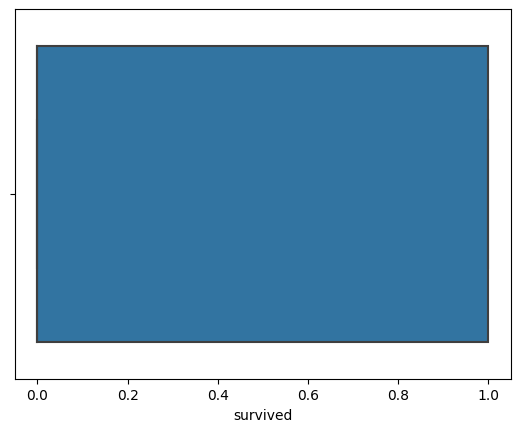

In [59]:
sns.boxplot(data=df,x='survived')

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [64]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [67]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [68]:
y_pred=classifier.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred,y_test)

0.7821229050279329

In [76]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       113
           1       0.67      0.80      0.73        66

    accuracy                           0.78       179
   macro avg       0.77      0.79      0.77       179
weighted avg       0.80      0.78      0.79       179



In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[87 13]
 [26 53]]


In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.803030303030303
Recall: 0.6708860759493671
F1-score: 0.7310344827586207
